In [19]:
import numpy
import pandas

import matplotlib.pyplot as plt
%matplotlib inline


# Introduction

This notebook is part of my attempt in becoming familiar with the ___CLOUDY___ photoionisation code (version C22). I tried to reproduce the popular hydrogen density n(H) vs. surface flux of hydrogen-ionizing photons $\Phi$ (H) plots which are commonly used in the abundace studies of the broad and narrow emission line regions of AGNs (see below).

In [139]:
cont8 = pandas.read_csv("blr8.con", sep='\t')

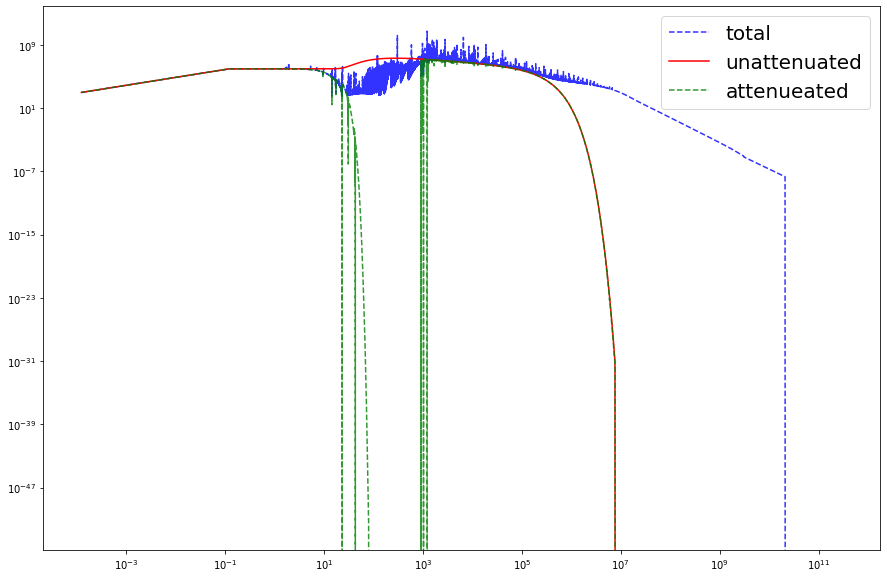

In [556]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))

ax.plot(cont8['#Cont  nu'], cont8['total'], "b--", alpha = 0.8, label = "total")
ax.plot(cont8['#Cont  nu'], cont8['incident'], "r", label = "unattenuated")
ax.plot(cont8['#Cont  nu'], cont8['trans'], "g--", alpha = 0.8, label = "attenueated")

plt.xscale(value = "log")
plt.yscale(value = "log")

plt.legend(fontsize = 20)

# plt.xlim(1000, 3000)
# plt.ylim(1e7, 3e7)

In [155]:
cont9 = pandas.read_csv("blr9.con", sep='\t')

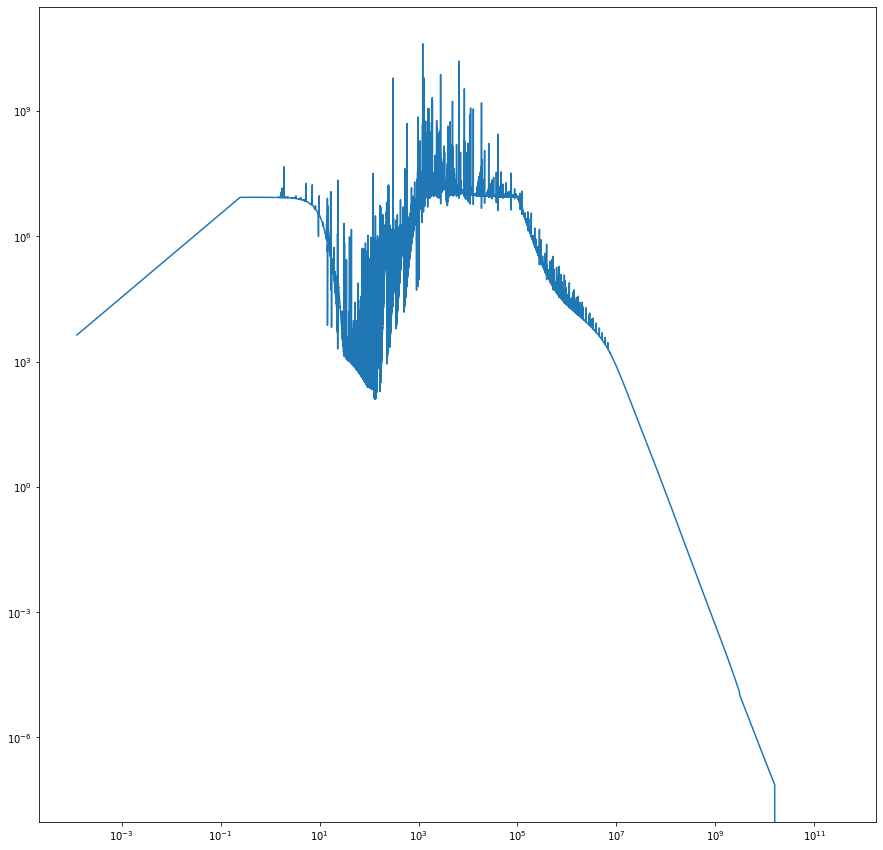

In [159]:
fig, ax = plt.subplots(1, 1, figsize = (15, 15))

ax.plot(cont9['#Cont  nu'], cont9['total'])
plt.xscale(value = "log")
plt.yscale(value = "log")

# plt.xlim(1000, 8000)
# plt.ylim(1e7, 3e7)

## C IV equivalnt width plot and hydrogen density n(H) vs. surface flux of hydrogen-ionizing photons $\Phi$ (H) plots

The following is my attempt in reproducing the eqvalent width plot of the C IV as provided in fig. 4 in ___Quick Start Guide to CLOUDY C22___. Also, C IV and Mg II plots of n(H)-$\phi(H)$ in fig. 1 of [Jack Baldwin et al. 1995](https://iopscience.iop.org/article/10.1086/309827) and fig. 2 of [Hengxiao Guo et al. 2020](https://iopscience.iop.org/article/10.3847/1538-4357/ab5db0). The n(H)-$\phi(H)$ plots are quite popular and many abundance studies make use of these plots.

In [18]:
blr_22 = pandas.read_csv("blr28.line", sep='\t')
blr_22

,#lineslist,Blnd 1549.00A,He 2 1640.41A,Si 3 1892.03A,Blnd 1909.00A,O 3 5006.84A,Blnd 2798.00A,H 1 1215.67A,He 2 1640.41A.1,Inci 1215.00A,H 1 4861.32A
0,iteration 1,7.771000e+05,7.371300e+04,3374.200,62596.0,57967.000000,6521.4000,1.163000e+06,7.371300e+04,2.171800e+06,2.525400e+04
1,########################### GRID_DELIMIT -- gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,iteration 1,8.569100e+05,7.271700e+04,4355.800,60227.0,42566.000000,36932.0000,1.179400e+06,7.271700e+04,2.171800e+06,2.469300e+04
3,########################### GRID_DELIMIT -- gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,iteration 1,9.384100e+05,7.134600e+04,5693.100,62952.0,31297.000000,65369.0000,1.184600e+06,7.134600e+04,2.171800e+06,2.436300e+04
...,...,...,...,...,...,...,...,...,...,...,...
6493,########################### GRID_DELIMIT -- gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6494,iteration 1,9.353700e+10,2.157700e+10,77.666,2806.0,0.002261,1.9641,1.383500e+10,2.157700e+10,2.171800e+13,1.708800e+09
6495,########################### GRID_DELIMIT -- gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6496,iteration 1,1.165000e+11,2.612700e+10,188970.000,14890.0,0.195450,7293.7000,1.506000e+10,2.612700e+10,2.171800e+13,2.124100e+09


In [6]:
index_range = numpy.arange(0, blr_22.shape[0], 2)#1922, 1352
blr_22_data = blr_22.iloc[index_range]
blr_22_data

,#lineslist,Blnd 1549.00A,He 2 1640.41A,Si 3 1892.03A,Blnd 1909.00A,O 3 5006.84A,Blnd 2798.00A,H 1 1215.67A,He 2 1640.41A.1,Inci 1215.00A,H 1 4861.32A
0,iteration 1,7.771000e+05,7.371300e+04,3374.200000,62596.0000,57967.000000,6521.4000,1.163000e+06,7.371300e+04,2.171800e+06,2.525400e+04
2,iteration 1,8.569100e+05,7.271700e+04,4355.800000,60227.0000,42566.000000,36932.0000,1.179400e+06,7.271700e+04,2.171800e+06,2.469300e+04
4,iteration 1,9.384100e+05,7.134600e+04,5693.100000,62952.0000,31297.000000,65369.0000,1.184600e+06,7.134600e+04,2.171800e+06,2.436300e+04
6,iteration 1,1.017900e+06,6.969400e+04,7557.600000,70642.0000,23482.000000,92969.0000,1.202000e+06,6.969400e+04,2.171800e+06,2.447900e+04
8,iteration 1,1.090300e+06,6.820400e+04,10150.000000,82640.0000,18027.000000,120270.0000,1.234300e+06,6.820400e+04,2.171800e+06,2.488500e+04
...,...,...,...,...,...,...,...,...,...,...,...
6488,iteration 1,2.482000e+09,1.417500e+10,0.000000,1.3948,0.000003,0.0000,1.042700e+10,1.417500e+10,2.171800e+13,1.034500e+09
6490,iteration 1,2.055200e+10,1.599200e+10,0.000497,52.0590,0.000026,0.0000,1.175900e+10,1.599200e+10,2.171800e+13,1.208600e+09
6492,iteration 1,6.248200e+10,1.834000e+10,0.170800,610.6800,0.000204,0.0000,1.277300e+10,1.834000e+10,2.171800e+13,1.418500e+09
6494,iteration 1,9.353700e+10,2.157700e+10,77.666000,2806.0000,0.002261,1.9641,1.383500e+10,2.157700e+10,2.171800e+13,1.708800e+09


In [7]:
phi      = numpy.arange(17, 24.1, 0.125)  # 16, 21.2, 0.2,    # 18, 24.2, 0.2
density  = numpy.arange(7, 14.1, 0.125)   #  7, 12.2, 0.2     # 8, 14.2, 0.2
phi_grid, den_grid = numpy.meshgrid(phi, density, indexing = 'ij')
# phi     = numpy.logspace(18, 24, 31)
# density = numpy.logspace(8, 14, 31) 
# phi_grid, den_grid = numpy.meshgrid(phi, density)

In [8]:
blr_22_data.columns

Index(['#lineslist', 'Blnd 1549.00A', 'He 2 1640.41A', 'Si 3 1892.03A',
       'Blnd 1909.00A', 'O  3 5006.84A', 'Blnd 2798.00A', 'H  1 1215.67A',
       'He 2 1640.41A.1', 'Inci 1215.00A', 'H  1 4861.32A'],
      dtype='object')

In [15]:
c_4  = blr_22_data['Blnd 1549.00A'].to_numpy()
o_3  = blr_22_data['O  3 5006.84A'].to_numpy()
mg_2 = blr_22_data['Blnd 2798.00A'].to_numpy()
he_2 = blr_22_data['He 2 1640.41A'].to_numpy()
h_b  = blr_22_data['H  1 4861.32A'].to_numpy()
dim_size = density.shape[0]
inci_1215 = blr_22_data['Inci 1215.00A'].to_numpy()
# print(phi_grid.shape)
c_4  = c_4.reshape(dim_size, dim_size)
o_3  = o_3.reshape(dim_size, dim_size)
mg_2 = mg_2.reshape(dim_size, dim_size)
he_2 = he_2.reshape(dim_size, dim_size)
h_b  = he_2.reshape(dim_size, dim_size)

inci_1215 = inci_1215.reshape(dim_size, dim_size)

line_ew = 1215.00*(c_4/inci_1215)


Text(0.5, 0, 'EW (C IV)')

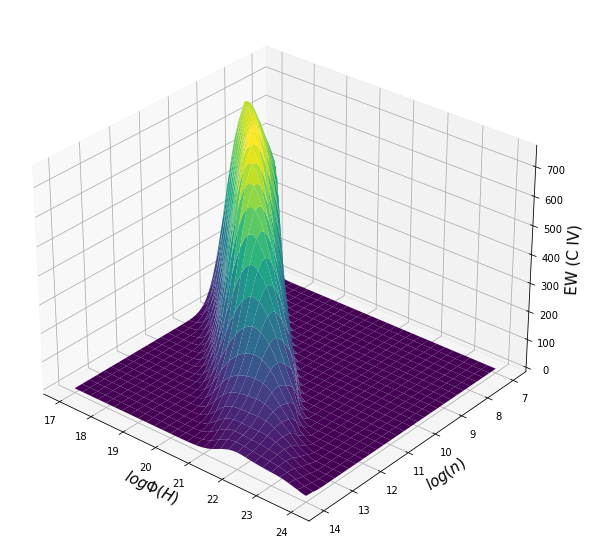

In [16]:

fig = plt.figure(figsize  = (10, 10))
ax  = plt.axes(projection = '3d')

ax.plot_surface(phi_grid, den_grid, line_ew, cmap = "viridis", edgecolor='none')
# ax.plot_surface(phi_grid[:, 8:41], den_grid[:, 8:41], line_ew[:, 8:41])

# ax.plot_surface(phi_grid, den_grid, ew_test, cmap = "viridis", edgecolor='none')

ax.set_ylim(ax.get_ylim()[::-1])

ax.view_init(elev = 30, azim = 310, vertical_axis = 'z')

ax.set_ylabel(r"$log (n)$",      fontsize = 15)
ax.set_xlabel(r"$log \Phi (H)$", fontsize = 15)
ax.set_zlabel("EW (C IV)",       fontsize = 15)

## C IV (1549)

See fig. 1 of [Jack Baldwin et al. 1995](https://iopscience.iop.org/article/10.1086/309827).

/tmp/ipykernel_3336781/2980073485.py:8: RuntimeWarning: divide by zero encountered in log10
  ax.contour(den_grid, phi_grid, numpy.log10(line_ew), levels = lvls, \


Text(0, 0.5, '$log \\Phi (H)$')

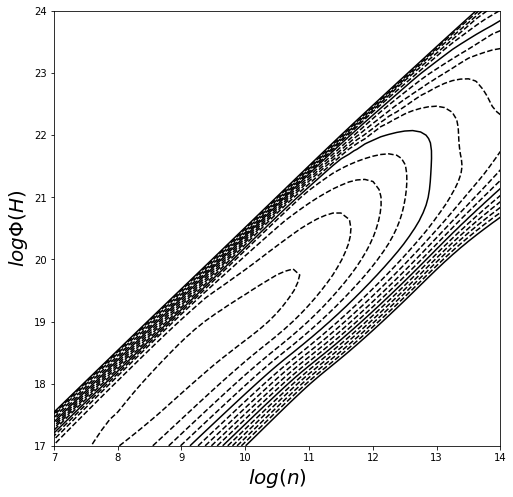

In [17]:
# https://stackoverflow.com/questions/56004938/how-to-use-both-dashed-negatives-defalut-style-line-colors-in-matplotlib-pytho

fig, ax = plt.subplots(1, 1, figsize = (8, 8))

origin  = "lower"
lvls    = numpy.arange(line_ew.min(), numpy.log10(line_ew.max()), 0.2).astype("float16")
                       
ax.contour(den_grid, phi_grid, numpy.log10(line_ew), levels = lvls, \
           origin = origin, colors = 'k', linestyles = numpy.where(numpy.mod(lvls, 1) == 0, "-", "--"))

ax.set_xlabel(r"$log (n)$", fontsize = 20)
ax.set_ylabel(r"$log \Phi (H)$", fontsize = 20)

## Mg II (2798) 

See fig. 2 of [Hengxiao Guo et al. 2020](https://iopscience.iop.org/article/10.3847/1538-4357/ab5db0) and fig. 1 of [Jack Baldwin et al. 1995](https://iopscience.iop.org/article/10.1086/309827).

In [11]:
line_ew = 1215.00*(mg_2/inci_1215)

/tmp/ipykernel_3336781/2980073485.py:8: RuntimeWarning: divide by zero encountered in log10
  ax.contour(den_grid, phi_grid, numpy.log10(line_ew), levels = lvls, \


Text(0, 0.5, '$log \\Phi (H)$')

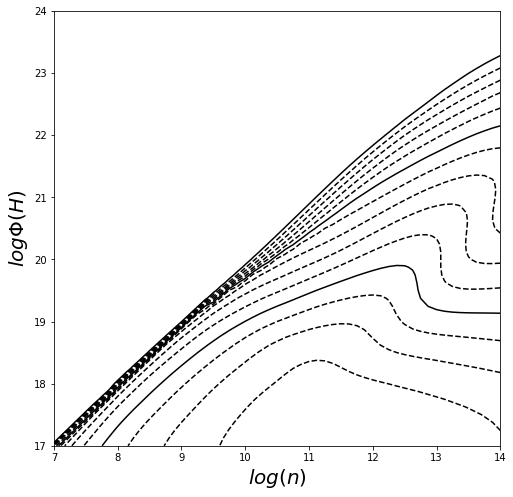

In [13]:
# https://stackoverflow.com/questions/56004938/how-to-use-both-dashed-negatives-defalut-style-line-colors-in-matplotlib-pytho

fig, ax = plt.subplots(1, 1, figsize = (8, 8))

origin  = "lower"
lvls    = numpy.arange(line_ew.min(), numpy.log10(line_ew.max()), 0.2).astype("float16")
                       
ax.contour(den_grid, phi_grid, numpy.log10(line_ew), levels = lvls, \
           origin = origin, colors = 'k', linestyles = numpy.where(numpy.mod(lvls, 1) == 0, "-", "--"))

ax.set_xlabel(r"$log (n)$", fontsize = 20)
ax.set_ylabel(r"$log \Phi (H)$", fontsize = 20)